In [1]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.utils import np_utils
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt
import os, shutil

import os

Using TensorFlow backend.


In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/yanto/Learn/HWKeras/FC/dataset'

# The directory where we will
# store our smaller dataset
base_dir = '/home/yanto/Learn/HWKeras/FC/datatrain'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [3]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [5]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(32, 32),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32,)


In [8]:
# AlexNet Define the Model
model = Sequential()
#model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=data_batch.shape[1:]))
# for original Alexnet
model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=data_batch.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 384)         885120    
__________

In [9]:
#from keras.optimizers import SGD
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
#opt = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/25
100/100 [==============================] - 59s 592ms/step - loss: 0.6883 - acc: 0.6097 - val_loss: 0.9771 - val_acc: 0.5622
Epoch 2/25
100/100 [==============================] - 57s 567ms/step - loss: 0.5610 - acc: 0.7259 - val_loss: 1.0073 - val_acc: 0.6166
Epoch 3/25
100/100 [==============================] - 57s 569ms/step - loss: 0.3747 - acc: 0.8322 - val_loss: 0.7541 - val_acc: 0.6986
Epoch 4/25
100/100 [==============================] - 57s 571ms/step - loss: 0.2454 - acc: 0.9028 - val_loss: 1.7306 - val_acc: 0.6405
Epoch 5/25
100/100 [==============================] - 57s 569ms/step - loss: 0.1803 - acc: 0.9300 - val_loss: 1.1508 - val_acc: 0.7030
Epoch 6/25
100/100 [==============================] - 57s 570ms/step - loss: 0.1707 - acc: 0.9391 - val_loss: 1.1327 - val_acc: 0.6933
Epoch 7/25
100/100 [==============================] - 57s 571ms/step - loss: 0.1290 - acc: 0.9553 - val_loss: 1.4107 - val_acc: 0.6758
Epoch 8/25
100/100 [==============================] - 5

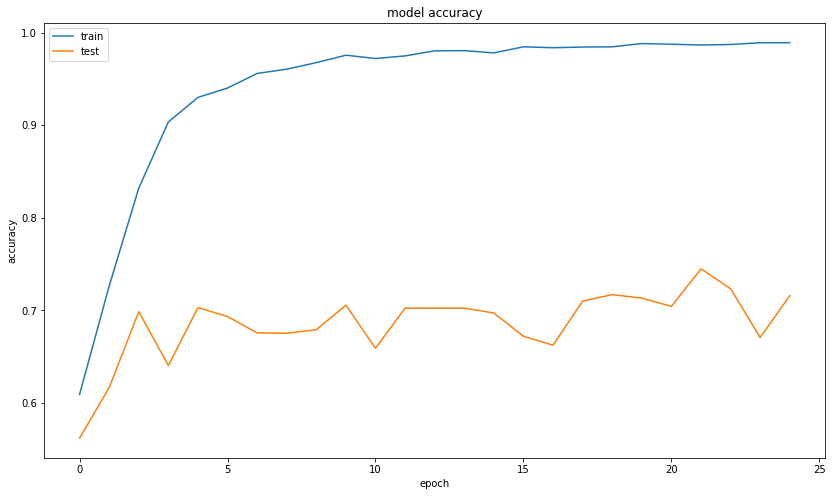

In [11]:
# summarize history for accuracy

plt.figure(figsize=(14,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

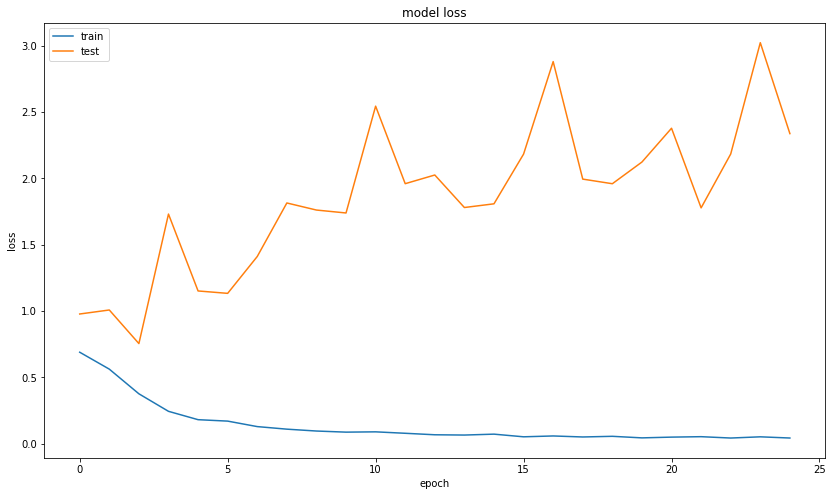

In [12]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
model.save('cat_dog_train.h5')